# Class Central Survey: compare target group 'Newbees' with 'Experienced' respondents

Newbees = respondents that haven't finished a MOOC yet

Experienced = respondents having finished at least 2 MOOCs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

## Read the survey data

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

## Create target group 'Newbees'

In [3]:
df = df[df['# MOOCs Finished'] != '1'] # remove respondents with 1 MOOC finished, these are no newbees neither experienced
df['# MOOCs Finished'].value_counts()


0      916
2.5    435
4.5    275
8      200
25     139
15     131
Name: # MOOCs Finished, dtype: int64

In [4]:
target_name = 'Newbees'
newbees = (df['# MOOCs Finished'] == '0')

## Generic function to plot barchart for any categorical feature on any target/nontarget split 

In [5]:
def binary_compare_categorical_barh(mask, feature, df=df,
                                            target_name='target', nontarget_name='Other', 
                                            split_name='visitor', answer='answer'):
    """Split dataframe into two based on mask
    Draw horizontal barcharts for each category item for both masked and unmasked object"""
    target = df[mask]
    nontarget = df[~mask]
    target_size, nontarget_size = len(target), len(nontarget)
    
    res_target = target[feature].value_counts()/target_size*100
    res_nontarget = nontarget[feature].value_counts()/nontarget_size*100
    
    result = pd.DataFrame({target_name: res_target, nontarget_name: res_nontarget})
    result[answer] = result.index
    
    res_df = pd.melt(result, id_vars=answer, var_name=split_name, value_name='percentage')
    print(res_df)
    
    sns.factorplot(x='percentage', y=answer, hue=split_name, data=res_df, kind='bar', orient='h', size=6, aspect=2)
    plt.title(feature)
    sns.despine(left=True, bottom=True)
    plt.show()
    return

## Generic function to plot barchart for any multi-categorical feature on any target/nontarget split

In [6]:
def binary_compare_multi_select_categorical_barh(df, target, target_name, question, selectors, nontarget_name = 'Others'):
    """draw a barchart for Survey results on a question that allows to select multiple categories
    df: dataframe to use
    target: selection of rows based on column values
    question: the question you want to analyse
    selectors: list of df column containing the selectors (values 0/1)"""
    size = {}
    target_df = df[target]
    nontarget_df = df[~target]
    size[target_name], size[nontarget_name] = len(target_df), len(nontarget_df)
    print(size)
    graph_targetdata = target_df.loc[:, selectors]
    graph_targetdata['target'] = target_name
    
    graph_nontargetdata = nontarget_df.loc[:, selectors]
    graph_nontargetdata['target'] = nontarget_name
    
    graph_data = pd.concat([graph_targetdata, graph_nontargetdata])
    
    melted = pd.melt(graph_data, id_vars='target', var_name='select', value_name='percentage')
    grouped = melted.groupby(['target', 'select'], as_index=False).sum()
    #print(size[grouped['target']])
    grouped.percentage = grouped.percentage/grouped['target'].map(size)*100 # make it percentage of total
    grouped['select'] = grouped['select'].apply(lambda x: x.split(": ")[1]) # remove prefix from string
    print(grouped)  
    
    sns.factorplot(x='percentage', y='select', hue='target', data=grouped, kind='bar', orient='h', size=6, aspect=2)
    sns.plt.title(question)
    sns.despine(left=True, bottom=True)
    sns.plt.show()

## Apply this plot on the target 'Willing to pay' for some categorical features

   answer      visitor  percentage
0     1.0  Experienced    2.982732
1     2.0  Experienced    3.139717
2     3.0  Experienced   10.282575
3     4.0  Experienced   30.690738
4     5.0  Experienced   51.648352
5     1.0      Newbees   50.436681
6     2.0      Newbees   16.921397
7     3.0      Newbees   16.921397
8     4.0      Newbees    8.515284
9     5.0      Newbees    6.550218


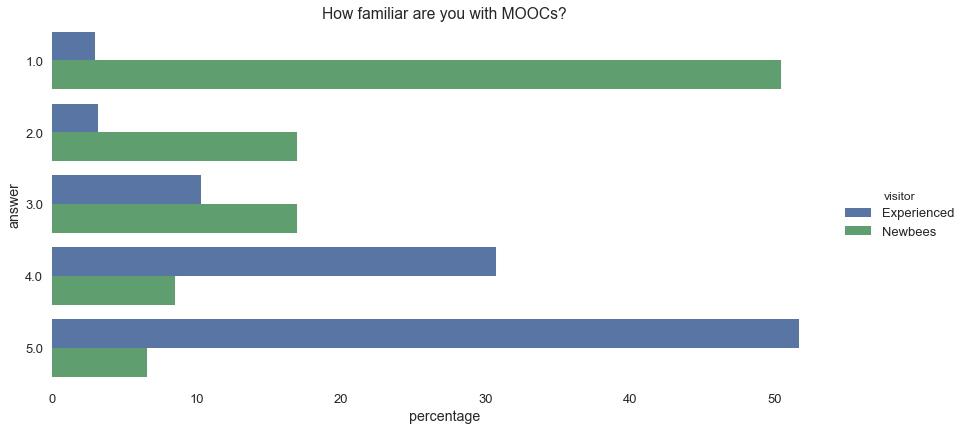

In [7]:
binary_compare_categorical_barh(mask=newbees, 
            target_name='Newbees', nontarget_name='Experienced', feature='How familiar are you with MOOCs?')

                        answer      visitor  percentage
0                       Africa  Experienced    7.770801
1      Australia / New Zealand  Experienced    4.788069
2                       Canada  Experienced    4.631083
3     Central or South America  Experienced    7.378336
4        East & Southeast Asia  Experienced    7.064364
5               Eastern Europe  Experienced    7.927786
6                        India  Experienced    6.828885
7                       Mexico  Experienced    2.119309
8               United Kingdom  Experienced    4.866562
9                United States  Experienced   30.847724
10  Western Europe (except UK)  Experienced   13.736264
11                      Africa      Newbees   16.484716
12     Australia / New Zealand      Newbees    2.292576
13                      Canada      Newbees    3.493450
14    Central or South America      Newbees    4.257642
15       East & Southeast Asia      Newbees    8.624454
16              Eastern Europe      Newbees    3

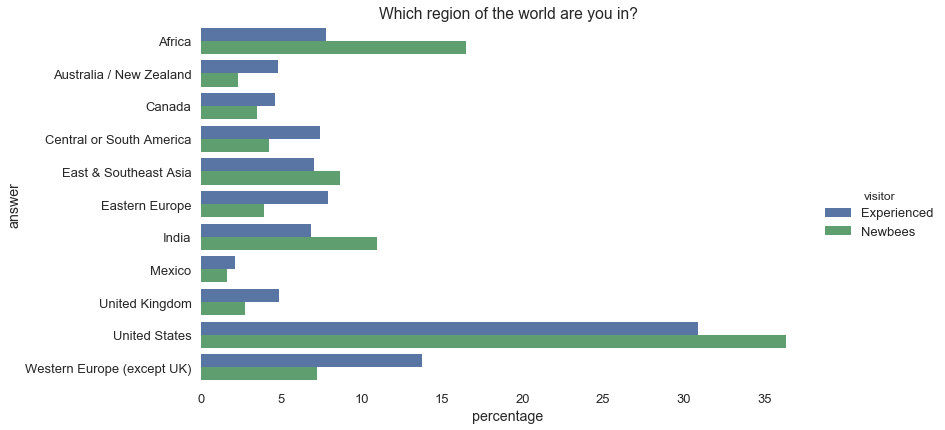

In [8]:
binary_compare_categorical_barh(mask=newbees, 
            target_name='Newbees', nontarget_name='Experienced', feature='Which region of the world are you in?')

Africa and India are the regions with significant more newbees than experienced MOOCers

   answer      visitor  percentage
0     1.0  Experienced   22.605965
1     2.0  Experienced   12.872841
2     3.0  Experienced   20.957614
3     4.0  Experienced   20.957614
4     5.0  Experienced   21.114600
5     1.0      Newbees   11.790393
6     2.0      Newbees    9.061135
7     3.0      Newbees   20.742358
8     4.0      Newbees   19.213974
9     5.0      Newbees   38.318777


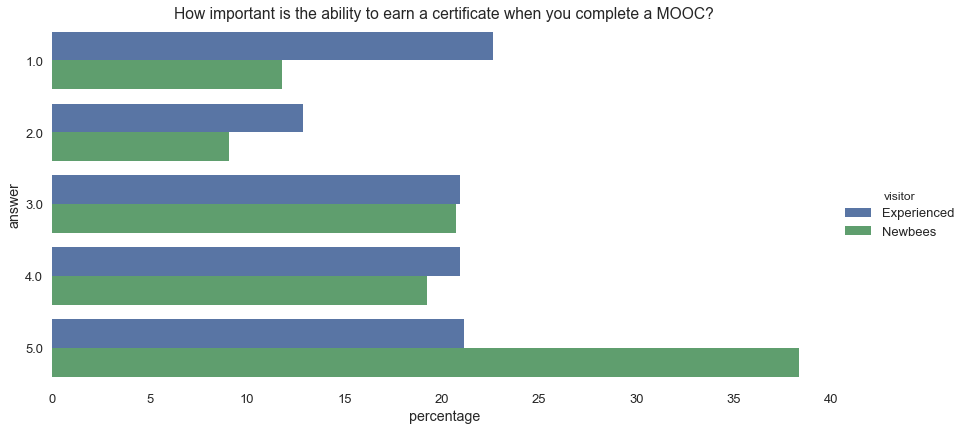

In [9]:
binary_compare_categorical_barh(mask=newbees, 
                                target_name='Newbees', nontarget_name='Experienced', 
                                feature='How important is the ability to earn a certificate when you complete a MOOC?')

Newbees find it more important to be able to earn a certificate than experienced respondents

{'Newbees': 916, 'Experienced': 1274}
        target                              select  percentage
0  Experienced       Access to reference materials   33.124019
1  Experienced  Learning skills for current career   51.098901
2  Experienced      Learning skills for new career   45.211931
3  Experienced                   Personal interest   85.557300
4  Experienced                       School credit    5.494505
5      Newbees       Access to reference materials   22.270742
6      Newbees  Learning skills for current career   50.327511
7      Newbees      Learning skills for new career   51.310044
8      Newbees                   Personal interest   70.305677
9      Newbees                       School credit   13.755459


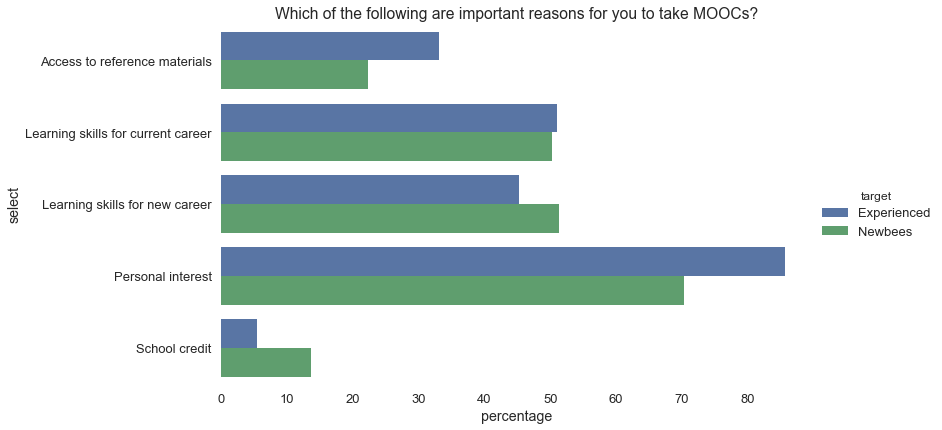

In [10]:
reasons = ['Reasons: Learning skills for current career', 'Reasons: Learning skills for new career', 
           'Reasons: School credit', 'Reasons: Personal interest', 'Reasons: Access to reference materials']
binary_compare_multi_select_categorical_barh(df, target=newbees, target_name='Newbees', nontarget_name='Experienced',
                question='Which of the following are important reasons for you to take MOOCs?', 
                selectors=reasons)

There is only a slight difference in the reasons to follow MOOCs between newbees and experienced users. Personal interest and access to reference material are somewhat more important reasons to take MOOCs for experienced respondents than for newbees.

{'Newbees': 916, 'Experienced': 1274}
         target                  select  percentage
0   Experienced  Institution/university   42.072214
1   Experienced              Instructor   18.524333
2   Experienced  Others recommendations   24.489796
3   Experienced                Platform   31.868132
4   Experienced                 Ratings   31.161695
5   Experienced           Topic/Subject   94.427002
6       Newbees  Institution/university   38.427948
7       Newbees              Instructor   12.445415
8       Newbees  Others recommendations   26.200873
9       Newbees                Platform   22.270742
10      Newbees                 Ratings   34.934498
11      Newbees           Topic/Subject   85.698690


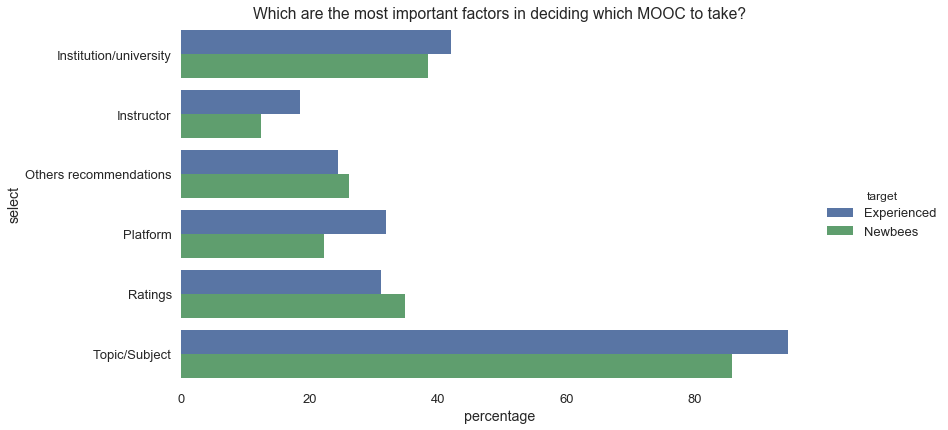

In [11]:
decisions = ['Decide: Topic/Subject', 'Decide: Instructor', 'Decide: Institution/university', 
             'Decide: Platform', 'Decide: Ratings', 'Decide: Others recommendations']
binary_compare_multi_select_categorical_barh(df, target=newbees, target_name='Newbees', nontarget_name='Experienced',
                question='Which are the most important factors in deciding which MOOC to take?', 
                selectors=decisions)

{'Newbees': 916, 'Experienced': 1274}
        target                                             select  percentage
0  Experienced         Actively contributing to discussion forums   30.612245
1  Experienced                         Browsing discussion forums   54.709576
2  Experienced  Connecting with learners outside the course en...   12.009419
3  Experienced  Connecting with other learners in the course e...   33.594976
4  Experienced  Taking the course with other people you know (...   12.323391
5      Newbees         Actively contributing to discussion forums   31.222707
6      Newbees                         Browsing discussion forums   51.637555
7      Newbees  Connecting with learners outside the course en...   20.633188
8      Newbees  Connecting with other learners in the course e...   45.305677
9      Newbees  Taking the course with other people you know (...   19.104803


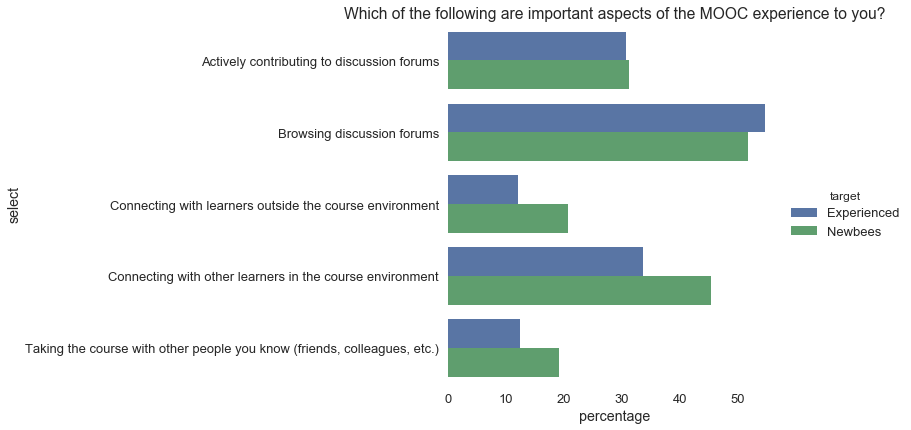

In [12]:
aspects = ['Aspects: Browsing discussion forums', 
           'Aspects: Actively contributing to discussion forums',
           'Aspects: Connecting with other learners in the course environment',
           'Aspects: Connecting with learners outside the course environment',
           'Aspects: Taking the course with other people you know (friends, colleagues, etc.)']
binary_compare_multi_select_categorical_barh(df, target=newbees, target_name='Newbees', nontarget_name='Experienced',
                question='Which of the following are important aspects of the MOOC experience to you?', 
                selectors=aspects)

Newbee MOOCers find it more important to connect with other learners

{'Newbees': 916, 'Experienced': 1274}
         target                                        select  percentage
0   Experienced                          Have not taken MOOCs    1.726845
1   Experienced  Helped me get a new job in a different field    5.494505
2   Experienced     Helped me get a new job in the same field    6.593407
3   Experienced  Higher performance evaluation at current job   16.248038
4   Experienced                                    Not Really   34.536892
5   Experienced             Promotion at current organization    3.610675
6   Experienced                School credit towards a degree    3.218210
7       Newbees                          Have not taken MOOCs   41.048035
8       Newbees  Helped me get a new job in a different field    1.310044
9       Newbees     Helped me get a new job in the same field    2.074236
10      Newbees  Higher performance evaluation at current job    2.947598
11      Newbees                                    Not Really   34.716157


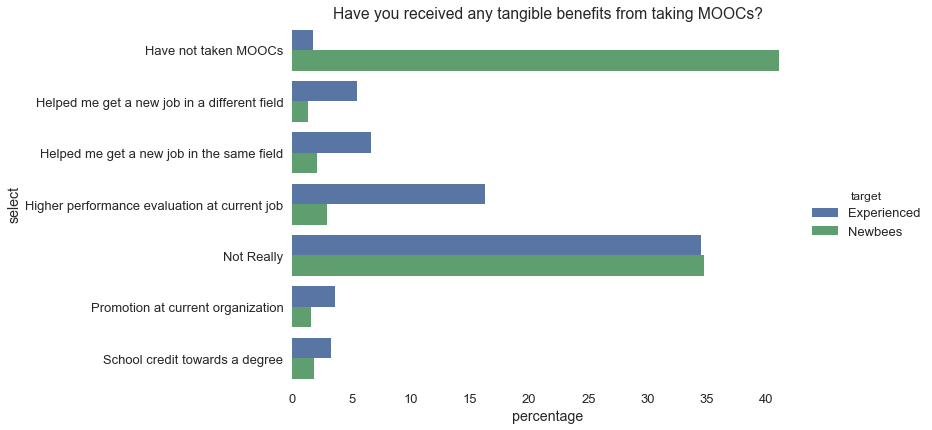

In [13]:
benefits = ['Benefit: Have not taken MOOCs', 
            'Benefit: Not Really',
            'Benefit: School credit towards a degree',
            'Benefit: Promotion at current organization',
            'Benefit: Higher performance evaluation at current job',
            'Benefit: Helped me get a new job in the same field',
            'Benefit: Helped me get a new job in a different field']
binary_compare_multi_select_categorical_barh(df, target=newbees, target_name='Newbees', nontarget_name='Experienced',
                question='Have you received any tangible benefits from taking MOOCs?', 
                selectors=benefits)

Expereinced MOOCers received more tangible benefits in MOOCs

{'Newbees': 916, 'Experienced': 1274}
        target                                             select  percentage
0  Experienced  A multi-course certification that the MOOC is ...   27.943485
1  Experienced                       The MOOC platform being used   13.500785
2  Experienced       The institution/university offering the MOOC   47.174254
3  Experienced                           The instructor/professor   16.562009
4  Experienced                                  The topic/subject   55.808477
5      Newbees  A multi-course certification that the MOOC is ...   16.921397
6      Newbees                       The MOOC platform being used    6.877729
7      Newbees       The institution/university offering the MOOC   25.982533
8      Newbees                           The instructor/professor    8.733624
9      Newbees                                  The topic/subject   30.458515


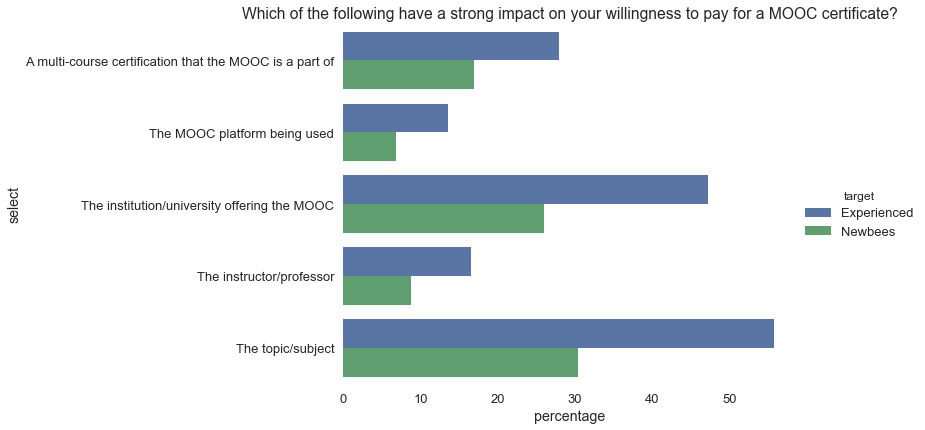

In [14]:
pays = ['Pay: The topic/subject',
        'Pay: The institution/university offering the MOOC',
        'Pay: The instructor/professor', 
        'Pay: The MOOC platform being used',
        'Pay: A multi-course certification that the MOOC is a part of']
binary_compare_multi_select_categorical_barh(df, target=newbees, target_name='Newbees', nontarget_name='Experienced',
                question='Which of the following have a strong impact on your willingness to pay for a MOOC certificate?', 
                selectors=pays)

   answer      visitor  percentage
0       0  Experienced    2.276295
1       1  Experienced    0.627943
2      15  Experienced   17.503925
3     2.5  Experienced   14.756672
4      25  Experienced   19.230769
5     4.5  Experienced   19.230769
6       8  Experienced   23.233909
7       0      Newbees   69.541485
8       1      Newbees   14.410480
9      15      Newbees    0.436681
10    2.5      Newbees    8.515284
11     25      Newbees    1.091703
12    4.5      Newbees    3.602620
13      8      Newbees    1.637555


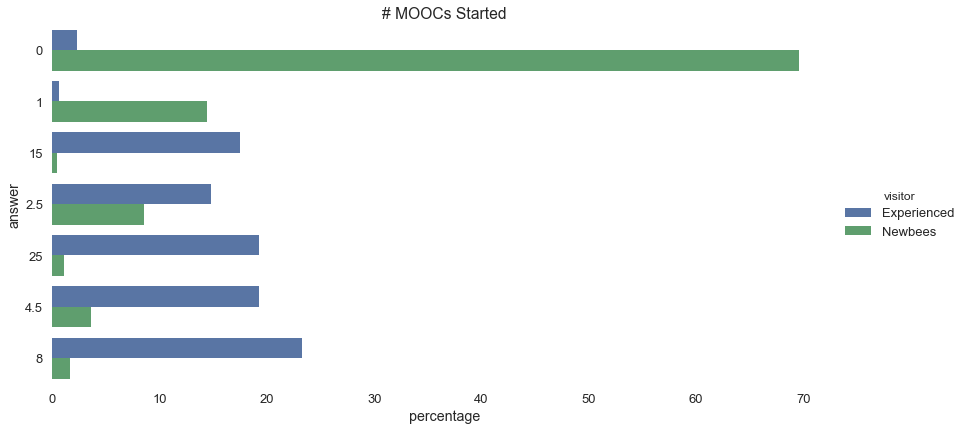

In [15]:
binary_compare_categorical_barh(mask=newbees, 
                                        target_name='Newbees', nontarget_name='Experienced', feature='# MOOCs Started')

The willingness to pay drops after starting about 7 course

   answer      visitor  percentage
0       0  Experienced         NaN
1      15  Experienced   10.282575
2     2.5  Experienced   34.144427
3      25  Experienced   10.910518
4     4.5  Experienced   21.585557
5       8  Experienced   15.698587
6       0      Newbees  100.000000
7      15      Newbees         NaN
8     2.5      Newbees         NaN
9      25      Newbees         NaN
10    4.5      Newbees         NaN
11      8      Newbees         NaN


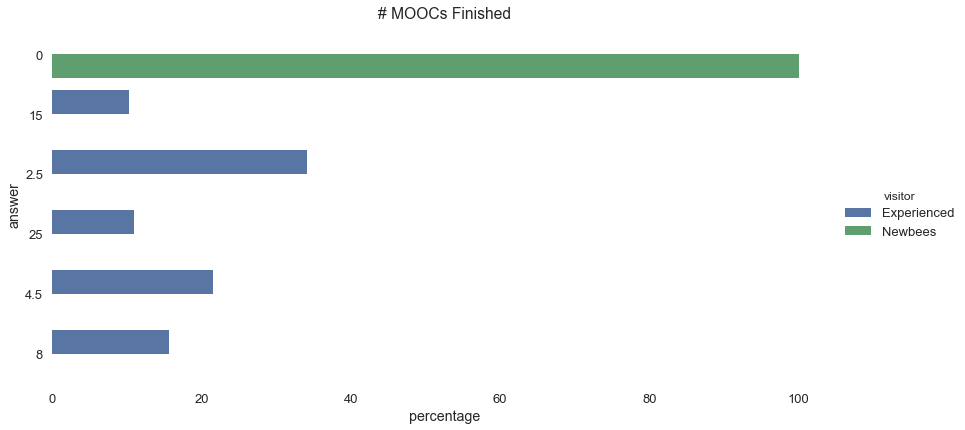

In [16]:
binary_compare_categorical_barh(mask=newbees, 
                                        target_name='Newbees', nontarget_name='Experienced', feature='# MOOCs Finished')

The more people finish MOOCs the less willingnes to pay. Is this the reason why Coursera is switching to a subscription model?

                           answer      visitor  percentage
0                   1-2 years ago  Experienced   24.960754
1                    2+ years ago  Experienced   45.996860
2          6 months to 1 year ago  Experienced   12.558870
3  I have not taken any MOOCs yet  Experienced    3.924647
4            Within past 6 months  Experienced   11.538462
5                   1-2 years ago      Newbees    4.366812
6                    2+ years ago      Newbees    4.366812
7          6 months to 1 year ago      Newbees    3.711790
8  I have not taken any MOOCs yet      Newbees   75.218341
9            Within past 6 months      Newbees   12.008734


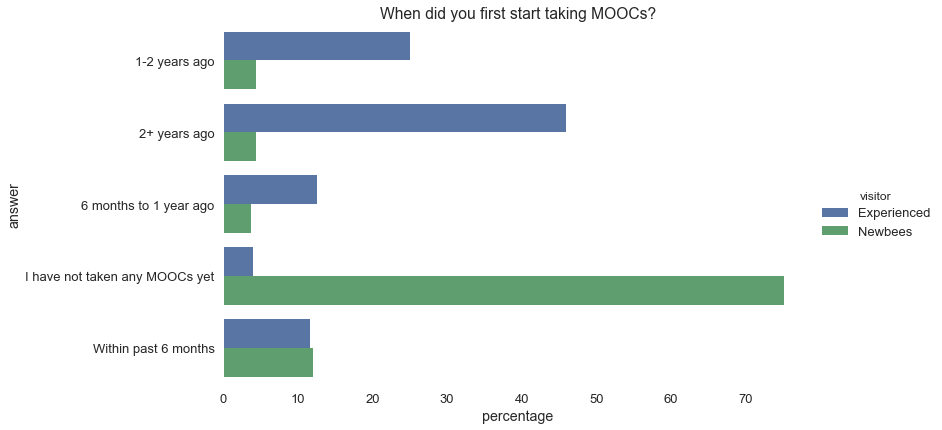

In [17]:
binary_compare_categorical_barh(mask=newbees, 
                                target_name='Newbees', nontarget_name='Experienced', 
                                feature='When did you first start taking MOOCs?')

   answer      visitor  percentage
0     1.0  Experienced   10.989011
1     2.0  Experienced   22.527473
2     3.0  Experienced   38.775510
3     4.0  Experienced   15.463108
4     5.0  Experienced    6.907378
5     1.0      Newbees    8.515284
6     2.0      Newbees   13.973799
7     3.0      Newbees   34.934498
8     4.0      Newbees   19.868996
9     5.0      Newbees   18.013100


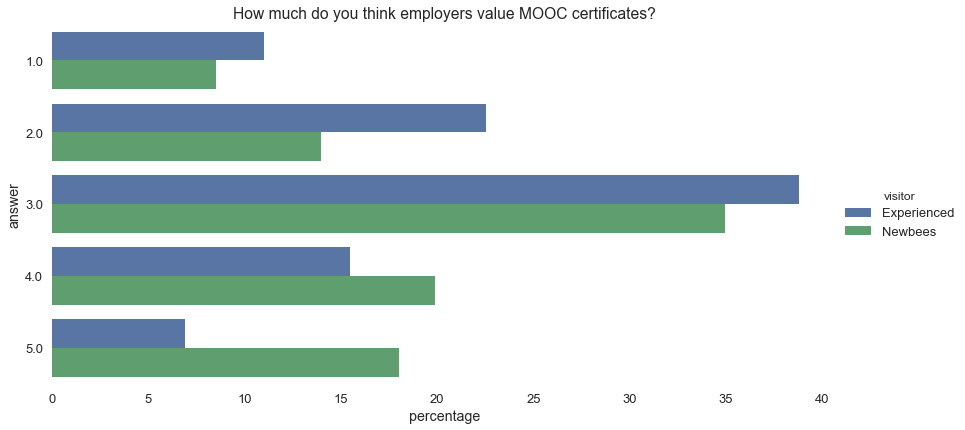

In [18]:
binary_compare_categorical_barh(mask=newbees, 
                                        target_name='Newbees', nontarget_name='Experienced',
                                        feature='How much do you think employers value MOOC certificates?')

Newbee MOOCers perceive the employment value of a MOOC certificate higher than experienced respondents 

                              answer      visitor  percentage
0             Graduate school degree  Experienced   49.921507
1         3 or 4 year college degree  Experienced   28.492936
2                 High school degree  Experienced   11.145997
3              2-year college degree  Experienced    7.221350
4  Did not graduate from high school  Experienced    1.569859
5             Graduate school degree      Newbees   35.371179
6         3 or 4 year college degree      Newbees   27.838428
7                 High school degree      Newbees   19.323144
8              2-year college degree      Newbees    9.825328
9  Did not graduate from high school      Newbees    6.004367


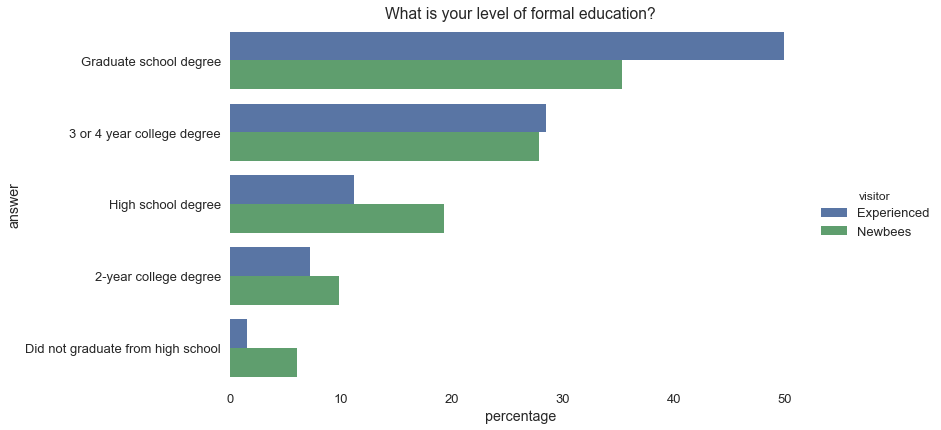

In [19]:
binary_compare_categorical_barh(mask=newbees, 
                                        target_name='Newbees', nontarget_name='Experienced',
                                        feature='What is your level of formal education?')

People with a graduate degree have also more experience with MOOCs than people with a lower eductation level

             answer      visitor  percentage
0   10-17 years old  Experienced    0.941915
1   18-21 years old  Experienced    4.631083
2   22-25 years old  Experienced    5.494505
3   26-29 years old  Experienced    7.064364
4   30-35 years old  Experienced    8.948195
5   36-45 years old  Experienced   16.640502
6   46-55 years old  Experienced   20.643642
7   56-65 years old  Experienced   19.937206
8     66+ years old  Experienced   14.599686
9   10-17 years old      Newbees    3.930131
10  18-21 years old      Newbees   10.371179
11  22-25 years old      Newbees   11.135371
12  26-29 years old      Newbees    9.606987
13  30-35 years old      Newbees   12.336245
14  36-45 years old      Newbees   16.048035
15  46-55 years old      Newbees   16.375546
16  56-65 years old      Newbees   11.572052
17    66+ years old      Newbees    7.423581


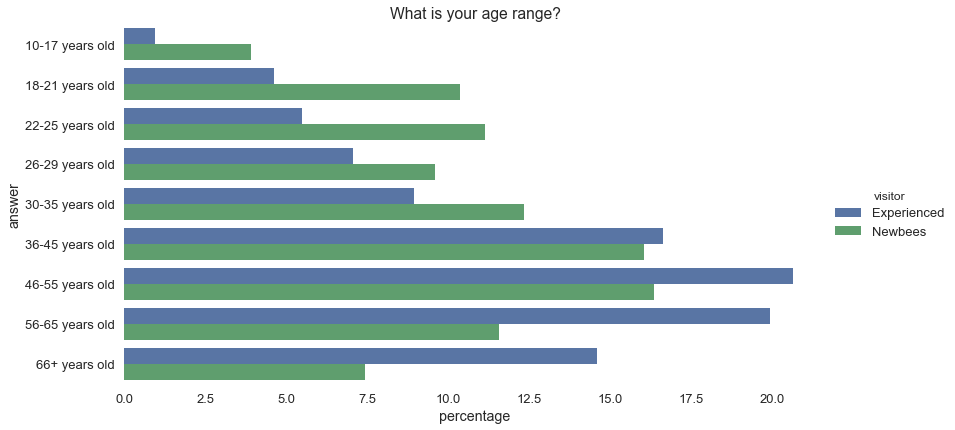

In [20]:
binary_compare_categorical_barh(mask=newbees, 
                                        target_name='Newbees', nontarget_name='Experienced',
                                        feature='What is your age range?')

In the age range 46+ there are significant more experienced MOOCers than in the younger age ranges.